In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fashion = tf.keras.datasets.fashion_mnist

In [3]:
(image_train, label_train), (image_test, label_test) = fashion.load_data()

In [4]:
image_train = image_train/255
image_test = image_test/255

In [5]:
model = tf.keras.Sequential([
                             keras.layers.Flatten(input_shape=(28,28)),
                             keras.layers.Dense(128, activation="relu"),
                             keras.layers.Dense(10, activation="softmax")
])

In [6]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
model.fit(image_train, label_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6337 - accuracy: 0.7783
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3928 - accuracy: 0.8592
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3480 - accuracy: 0.8723
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3147 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.8922


In [8]:
test_loss, test_accuracy = model.evaluate(image_test, label_test, verbose=1)

313/313 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8764


In [15]:
pd.DataFrame({
    "Test Accuracy (%)": test_accuracy*100,
    "Loss": test_loss
}, index=[0])

,Test Accuracy (%),Loss
0,87.639999,0.344673


In [10]:
predict = model.predict(image_test)

print(predict[2]) # it returns a list with the probability distribution amongst all classes
np.argmax(predict[2]) # Return only the biggest value, i.e., the most probable class

[7.2062599e-06 9.9999273e-01 1.7341613e-08 4.2496580e-08 1.3913477e-08
 2.1823663e-14 4.5194919e-09 3.6765114e-15 5.8343122e-11 3.7659969e-14]


1

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
classes = []
for i in range(0, 10000):
  classes.append(class_names[np.argmax(predict[i])])

actual_classes = []
for i in label_test.tolist():
  actual_classes.append(class_names[i])

In [13]:
pd.DataFrame({
    "Actual Class": actual_classes,
    "Predicted Class": classes
})

,Actual Class,Predicted Class
0,Ankle boot,Ankle boot
1,Pullover,Pullover
2,Trouser,Trouser
3,Trouser,Trouser
4,Shirt,Shirt
...,...,...
9995,Ankle boot,Ankle boot
9996,Trouser,Trouser
9997,Bag,Bag
9998,Trouser,Trouser


Pick a number: 50


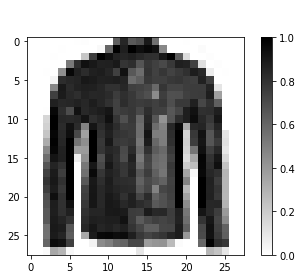

In [16]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label + ",\nGuess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = image_test[num]
label = label_test[num]
predict(model, image, label)